# load and import

In [1]:
R.version.string
library('dplyr')

library('stringr')
library('tidyr')
library('ggplot2')

library(ggh4x)
# library(tidyverse)
# Load necessary libraries
# library(magick)
library(cowplot)
library(patchwork)
library(gridExtra)
library(png)
library(grid)

[1] "R version 4.3.1 (2023-06-16)"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
map_id_name <- read.csv('../gene_table_and_other_scripts/bioMartR_Ath_all_genes_info_googled.csv')
map_id_name <- map_id_name %>% dplyr::rename('gene_name' = 'external_gene_name', 'gene_id' = 'ensembl_gene_id')
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
AT2G07746,
AT3G09970,RLPH2


In [3]:
source('../gene_table_and_other_scripts/theme_Publication.R')

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont(

# GO terms

In [4]:
GO_ID_terms <-  readRDS('../Pathway_plot//Rdata/GO_ID_terms.rds')

In [5]:
JA <- GO_ID_terms %>% filter(GO_ID == 'GO:0009753', code != 'IEA') %>% select(AGI)

In [6]:
PCD <- GO_ID_terms %>% filter(GO_ID == 'GO:0012501', code != 'IEA') %>% select(AGI)

**<span style="color:red">### remove TIR  and P-loop, only have 2 AGI</span>**


# Pathways

In [7]:
updated_NLRs_table <- read.csv("../gene_table_and_other_scripts/Col-0_NLRs_167_Ya-Long_Donghui_20240321.csv") %>% 
    select(AGI, Primary.Gene.Symbol)

In [8]:
NLRs_and_TIRs <- read.csv(file = "../gene_table_and_other_scripts/NLRs_and_TIR_only.csv") 

In [9]:
Pathways_Ngou_2021 <- readxl::read_excel("../gene_table_and_other_scripts/Ngou_2021_Nature_figure2E_pathways_mod.xlsx")

In [10]:
Pathways <- Pathways_Ngou_2021 %>% dplyr::select(Target, GeneFamily)
Pathways <- Pathways %>%as.data.frame  %>% dplyr::rename('AGI' = 'Target')
LRRs <- Pathways %>% filter(GeneFamily %>% str_detect('LRR'))

In [11]:
LRRs

AGI,GeneFamily
<chr>,<chr>
AT1G51820,LRR-RLKs
AT2G19190,LRR-RLKs
AT1G17750,LRR-RLKs
AT1G55610,LRR-RLKs
AT1G51890,LRR-RLKs
AT1G74360,LRR-RLKs
AT1G73080,LRR-RLKs
AT3G13380,LRR-RLKs
AT1G56140,LRR-RLKs


## add GO terms

# Res

In [12]:
Res_adr1s <-  readRDS('../JC14_and_DMs/Rdata/Res_adr1.rds')
Res_3DM <-  readRDS('../3DM_shoot/Rds_Rdata/Res_3DM.2023-04-21 14:05:06rds')
Res_3DM_and_adr1s <- Res_3DM  %>% rbind(Res_adr1s)

In [13]:
Res_2DM <- Res_3DM %>% filter(contrast %>% str_detect('DM1/DM2d|DM6/DM7'))

In [14]:
Res_Pathogen <- readRDS('../RNA_seq_Pathogen/Rds_Rdata_hisat2//Res2023-04-21 15:54:40.rdata') %>% filter(Contrast %>% str_detect('Mock') ) %>%filter(Contrast %>% str_detect('Avr'))
Res_Pathogen <- Res_Pathogen %>% select(Gene, log2FoldChange, Contrast)  %>% dplyr::rename('source' = 'Contrast', 'AGI' = 'Gene')

In [15]:
Res_Pathogen %>% distinct()

AGI,log2FoldChange,source
<chr>,<dbl>,<chr>
AT1G30814,-0.829686864,AvrRpt2-6h_vs_Mock-6h
AT1G78930,-0.011894928,AvrRpt2-6h_vs_Mock-6h
AT1G71695,-0.098855557,AvrRpt2-6h_vs_Mock-6h
AT1G58983,0.083782797,AvrRpt2-6h_vs_Mock-6h
AT1G12980,-2.460711255,AvrRpt2-6h_vs_Mock-6h
AT1G56250,0.254901801,AvrRpt2-6h_vs_Mock-6h
AT1G69810,0.661998002,AvrRpt2-6h_vs_Mock-6h
AT1G72450,1.784604326,AvrRpt2-6h_vs_Mock-6h
AT1G76280,-0.340306572,AvrRpt2-6h_vs_Mock-6h


In [16]:
Res_adr1s <-  readRDS('../JC14_and_DMs/Rdata/Res_adr1.rds')
Res_adr1s <-  Res_adr1s %>% select(AGI, log2FoldChange, line) %>% dplyr::rename('source' = 'line')

Res_3DM <-  readRDS('../3DM_shoot/Rds_Rdata/Res_3DM.2023-04-21 14:05:06rds')
Res_3DM <- Res_3DM %>% select(AGI, log2FoldChange, line)%>% dplyr::rename('source' = 'line')

# Res_Pathogen <- readRDS('../RNA_seq_Pathogen/Rds_Rdata_hisat2//Res2023-04-21 15:54:40.rdata')
# Res_Pathogen <- Res_Pathogen %>% select(Gene, log2FoldChange, Contrast)  %>% dplyr::rename('source' = 'Contrast', 'AGI' = 'Gene')
# Res_Pathogen <- Res_Pathogen %>% filter( source %>% str_detect('control', negate = T) )# %>% pull(source) %>% unique

Res_combined <- Res_3DM %>% rbind(Res_Pathogen)  %>% rbind(Res_adr1s)
Res_combined <- Res_combined %>% dplyr::rename('log2FC' = 'log2FoldChange')
Res_combined <- Res_combined %>% mutate(source = source %>% str_remove('_vs_Mock-\\d{1,2}h$'))

In [17]:
Res_combined %>% pull(source) %>% unique

[1] "DM6/DM7"        "DM1/DM2d"       "DM10/DM11"      "AvrRpt2-6h"    
 [5] "AvrRpt2-12h"    "AvrRpt2-20h"    "AvrRps4-6h"     "AvrRps4-12h"   
 [9] "AvrRps4-20h"    "DM1/DM2d_adr1s" "DM6/DM7_adr1s"  "Col-0_adr1s"

In [18]:
Res_combined <- Res_combined %>% mutate(source = factor(source, levels = c('DM10/DM11','DM1/DM2d','DM1/DM2d_adr1s','DM6/DM7','DM6/DM7_adr1s','Col-0_adr1s','AvrRpt2-6h','AvrRpt2-12h','AvrRpt2-20h','AvrRps4-6h','AvrRps4-12h','AvrRps4-20h')) )
Res_combined$source %>% unique

[1] DM6/DM7        DM1/DM2d       DM10/DM11      AvrRpt2-6h     AvrRpt2-12h   
 [6] AvrRpt2-20h    AvrRps4-6h     AvrRps4-12h    AvrRps4-20h    DM1/DM2d_adr1s
[11] DM6/DM7_adr1s  Col-0_adr1s   
12 Levels: DM10/DM11 DM1/DM2d DM1/DM2d_adr1s DM6/DM7 ... AvrRps4-20h

In [19]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  # "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  # "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
    "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

bar_colors <-  c("DM6/DM7 vs Col-0" = "#EDC5BF", 'DM1/DM2d vs Col-0' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s vs Col-0' = '#008DFA' , 'DM1/DM2d_adr1s vs Col-0' = '#008DFA', 
                 'Col-0_adr1s vs Col-0' = '#008DFA',
                  "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67")

In [61]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  # "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  # "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
    "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

bar_colors <-  c("DM6/DM7 vs Col-0" = "#EDC5BF", 'DM1/DM2d vs Col-0' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s vs Col-0' = '#008DFA' , 'DM1/DM2d_adr1s vs Col-0' = '#008DFA', 
                 'Col-0_adr1s vs Col-0' = '#008DFA',
                 "DM6/DM7" = "#EDC5BF", 'DM1/DM2d' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s' = '#008DFA' , 'DM1/DM2d_adr1s' = '#008DFA', 
                 'Col-0_adr1s' = '#008DFA',
                  "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#cfa3e6", "AvrRps4-20h" = "#a884ba", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#cf8655")

theme_custom <- function() {
  theme(
    text = element_text(family = "Arial", size = 8, face = "plain"),  # Set face = "plain" for all text
    axis.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for axis titles
    axis.text = element_text(family = "Arial", size = 8, face = "plain"),   # Overrides for axis text
    legend.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend titles
    legend.text = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend text
    strip.text.x = element_text(family = "Arial", size = 8, face = "plain"),  # Specific adjustment for x facet label
    strip.text.y = element_text(family = "Arial", size = 8, angle = 0, face = "plain")  # Specific adjustment for y facet label
  )
}


# Bar plot of NLRs

In [21]:
Res_combined %>% filter(AGI  == 'AT4G14390')

AGI,log2FC,source
<chr>,<dbl>,<fct>
AT4G14390,6.35565974,DM6/DM7
AT4G14390,8.05872953,DM1/DM2d
AT4G14390,8.98735730,DM10/DM11
AT4G14390,0.04927757,AvrRpt2-6h
AT4G14390,0.00000000,AvrRpt2-12h
AT4G14390,0.17014255,AvrRpt2-20h
AT4G14390,0.06511173,AvrRps4-6h
AT4G14390,3.58068134,AvrRps4-12h
AT4G14390,1.63150265,AvrRps4-20h


In [22]:
library(glue)
library(ggtext)

In [23]:
options(repr.plot.width=8, repr.plot.height=4)
cols_text <- c( 'TIR-NBS-LRR' =  "#386cb0",
          'TIR'= "#a6cee3", "TIR-NBS" = "#2581ba",
          
          "CC-NBS-LRR" = "#fdb462",'CC-NBS' =  "#fb9a99", 'RPW8-NBS-LRR' = "#984ea3",
          
          'NBS-LRR' = "#b3b330", 
          'P-loop' = "#7fc97f"
         )

# show_col(cols_text, ncol = 6)
# cols_text
cols_text_2 <- cols_text %>% as.data.frame() %>%  tibble::rownames_to_column("Class") %>% rename(label_color = 2)

In [24]:
Res_NLRs <- Res_combined %>% right_join(NLRs_and_TIRs, by = 'AGI')

In [25]:
Res_NLRs <- Res_NLRs %>% 
    mutate(plot_label = paste0(Symbol, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) %>% 
    left_join(cols_text_2, by = 'Class')  

In [26]:
# Extract plot_label and label_color from Res_NLRs_up
plot_label_color <- Res_NLRs %>% select(plot_label, label_color)

# Create a named list with label_color as content and plot_label as names
color_list <- setNames(as.list(plot_label_color$label_color), plot_label_color$plot_label)


In [27]:
Res_NLRs_color <- Res_NLRs %>% mutate(label_color_markdown =
        glue("<i style='color: {color_list[plot_label]}'>{plot_label}</i>")) 


In [28]:
Res_NLRs_color

AGI,log2FC,source,Class,Symbol,Organization,plot_label,label_color,label_color_markdown
<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<glue>
AT1G56540,0.73768310,DM6/DM7,TIR-NBS-LRR,AT1G56540,clustered,AT1G56540,#386cb0,<i style='color: #386cb0'>AT1G56540</i>
AT1G63360,0.09548923,DM6/DM7,CC-NBS-LRR,AT1G63360,clustered,AT1G63360,#fdb462,<i style='color: #fdb462'>AT1G63360</i>
AT1G53350,0.74051156,DM6/DM7,CC-NBS-LRR,AT1G53350,NA,AT1G53350,#fdb462,<i style='color: #fdb462'>AT1G53350</i>
AT1G58848,1.66607221,DM6/DM7,CC-NBS-LRR,AT1G58848,NA,AT1G58848,#fdb462,<i style='color: #fdb462'>AT1G58848</i>
AT1G63880,0.90581650,DM6/DM7,TIR-NBS-LRR,AT1G63880,clustered,AT1G63880,#386cb0,<i style='color: #386cb0'>AT1G63880</i>
AT1G61300,-1.09160953,DM6/DM7,NBS-LRR,AT1G61300,clustered,AT1G61300,#b3b330,<i style='color: #b3b330'>AT1G61300</i>
AT1G63740,0.81169961,DM6/DM7,TIR-NBS-LRR,AT1G63740,clustered,AT1G63740,#386cb0,<i style='color: #386cb0'>AT1G63740</i>
AT1G27170,0.35303205,DM6/DM7,TIR-NBS-LRR,AT1G27170,clustered,AT1G27170,#386cb0,<i style='color: #386cb0'>AT1G27170</i>
AT1G31540,1.20302747,DM6/DM7,TIR-NBS-LRR,AT1G31540,singleton,AT1G31540,#386cb0,<i style='color: #386cb0'>AT1G31540</i>


<i style='color: #386cb0'>AT1G65850</i>

<i style='color: green'>the idea here is that pre set order x = reorder(label_color_markdown, log2FoldChange) is not preserved, I have to plot 3 geom_bar first, then put the hundreds layers of each NLRs geom_bar over it. </i>

In [29]:
keep_NLRs <-  c (Res_NLRs_color %>% filter(abs(log2FC) > 2) %>% pull(AGI) %>% unique(),
                 'AT5G66900') #add nrg1.1

In [30]:
Res_NLRs_color <- Res_NLRs_color %>% dplyr::filter(AGI %in% keep_NLRs )
Res_NLRs_color <- Res_NLRs_color %>% arrange(desc(log2FC))

In [31]:
Res_NLRs_color <- Res_NLRs_color %>% mutate(category = source %>% str_remove('_adr1s') %>% str_remove('-\\d{1,2}h$'))

In [32]:
each_NLR_max_log2FC <- Res_NLRs_color %>% group_by(AGI) %>% slice_head(n=1) %>% ungroup %>% arrange(desc(log2FC))

In [33]:
each_NLR_Col_log2FC <- Res_NLRs_color %>% filter(source == 'Col-0_adr1s' ) %>%
     arrange(desc(log2FC))

In [34]:
Res_NLRs_color <- Res_NLRs_color %>% mutate(source = source %>% str_replace('DM6/DM7$', 'DM6/DM7 vs Col-0') %>%
        str_replace('DM6/DM7_adr1s', 'DM6/DM7_adr1s vs Col-0') %>%
        str_replace('DM1/DM2d$', 'DM1/DM2d vs Col-0') %>% str_replace('DM1/DM2d_adr1s', 'DM1/DM2d_adr1s vs Col-0') %>%
        str_replace('Col-0_adr1s', 'Col-0_adr1s vs Col-0')
                         )

In [35]:
options(repr.plot.width=8.4, repr.plot.height=6, repr.plot.res = 50)


plot_NLRs_overlay_bar <- function(Res = Res_NLRs_color, Res_base = each_NLR_Col_log2FC,  alpha = 0.6, facet_row = "Class", facet_col = "category") {
  library(purrr)
  library(rlang) # for sym()

  # Convert facet strings to symbols
  facet_row <- sym(facet_row)
  facet_col <- sym(facet_col)
  
  # Step 1: Split the dataframe based on log2FoldChange
  over0 <- Res %>% filter(log2FC > 0) 
  below0 <- Res %>% filter(log2FC <= 0)

  # Step 2: Create a list to store the dataframes for each layer
  layers <- list()

  # Step 3: Iterate until there are no rows left in over0 and below0
  layer_num <- 1
  while (nrow(over0) > 0 || nrow(below0) > 0) {
    max_over0 <- over0 %>% group_by( AGI) %>% slice_max(log2FC)
    min_below0 <- below0 %>% group_by( AGI) %>% slice_min(log2FC)

    over0 <- suppressMessages(anti_join(over0, max_over0))
    below0 <- suppressMessages(anti_join(below0, min_below0))

    layer <- bind_rows(max_over0, min_below0)
    layers[[layer_num]] <- layer

    layer_num <- layer_num + 1
  }

  # Step 4: Use the layers list to add new layers to the ggplot using geom_bar
  bar_NLRs_base <- Res %>%
    ggplot(aes(x = reorder(label_color_markdown, log2FC), y = log2FC, label = label_color_markdown)) +
    labs(y = "Log2 FoldChange") +
    coord_flip() +
    guides(fill = guide_legend(reverse = TRUE, nrow = 2)) +
    scale_y_continuous(breaks = c(-8,-6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16),
                       expand = c(0, 0)) +
    scale_fill_manual(values = bar_colors)+
    theme_Publication() +
    theme(axis.text = element_text(size = 8),
          axis.title = element_text(size = 8),
          axis.title.y = element_blank()) +
    theme(text = element_text(size = 8, family = "Arial"), 
          strip.text = element_text(size = 12)) +
    facet_grid(rows = vars(!!facet_row), cols = vars(!!facet_col), scales = "free", space = "free") + # use !! to evaluate symbols
    theme(axis.text.y = element_markdown())   +
    geom_bar(data = Res_base,
                 position="identity", stat='identity', aes(fill=source), width = .8,  alpha = 0 ) 

  bar_NLRs <- reduce(layers, function(plot, layer) {
    plot +
      geom_bar(data = layer,
               position = "identity",
               stat = 'identity',
               aes(fill = source),
               width = .8,
               alpha = alpha)
  }, .init = bar_NLRs_base)
  bar_NLRs <- bar_NLRs + geom_hline(yintercept=0,  color = "black", size=0.5)
  # Return the final plot
  return(bar_NLRs)
}



In [36]:
NLRs_in_connectivity_table <- read.csv('./WGCNA_output_all/NLRs_and_TIRs_connectivity_table_info.csv') 

In [37]:
NLRs_in_connectivity_table %>% group_by(module) %>% summarise(count = n())

module,count
<chr>,<int>
MEblue,1
MEcyan,37
MEdarkgreen,1
MEgreenyellow,7
MEmidnightblue,1
MEpurple,2
MEsalmon,9


In [38]:
Res_NLRs_in_connectivity_table <- NLRs_in_connectivity_table %>% dplyr::rename('AGI' = 'gene') %>% 
    left_join(Res_NLRs_color, by = 'AGI') %>% filter(category != 'DM10/DM11') %>% distinct

In [39]:
Res_NLRs_in_connectivity_table <- Res_NLRs_in_connectivity_table %>% mutate(module = factor(module, levels = c('MEblue','MEpurple','MEdarkturquoise',   'MEcyan','MEdarkred',
            'MEgreenyellow','MEsalmon','MEtan','MEdarkgreen','MEmidnightblue') %>% rev()))

In [40]:
Res_NLRs_in_connectivity_table_Col <- Res_NLRs_in_connectivity_table %>% 
        filter(source == 'Col-0_adr1s vs Col-0' ) %>% arrange(desc(log2FC))

In [41]:
Res_NLRs_in_connectivity_table %>% saveRDS('./Rdata/Res_NLRs_in_connectivity_table.rds')


In [42]:
Res_NLRs_in_connectivity_table %>% pull(AGI) %>% unique() %>% length

[1] 46

In [43]:
Res_NLRs_in_connectivity_table  

AGI,connectivity_rowSums_adj,module,gene_name,DM6.DM7,DM1.DM2d,DM10.DM11,AvrRpt2.6h,AvrRpt2.12h,AvrRpt2.20h,⋯,Organization.x,log2FC,source,Class,Symbol.y,Organization.y,plot_label,label_color,label_color_markdown,category
<chr>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<glue>,<chr>
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,3.1036966,AvrRpt2-20h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRpt2
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,2.8122337,AvrRps4-20h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRps4
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,2.5815041,DM1/DM2d vs Col-0,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,DM1/DM2d
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,2.1317400,DM6/DM7 vs Col-0,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,DM6/DM7
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,2.0996460,DM1/DM2d_adr1s vs Col-0,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,DM1/DM2d
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,1.7994546,AvrRpt2-12h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRpt2
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,1.6284234,AvrRps4-12h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRps4
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,0.8091689,AvrRpt2-6h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRpt2
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,0.7525973,AvrRps4-6h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRps4



Attaching package: ‘purrr’


The following object is masked from ‘package:scales’:

    discard



Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice



Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


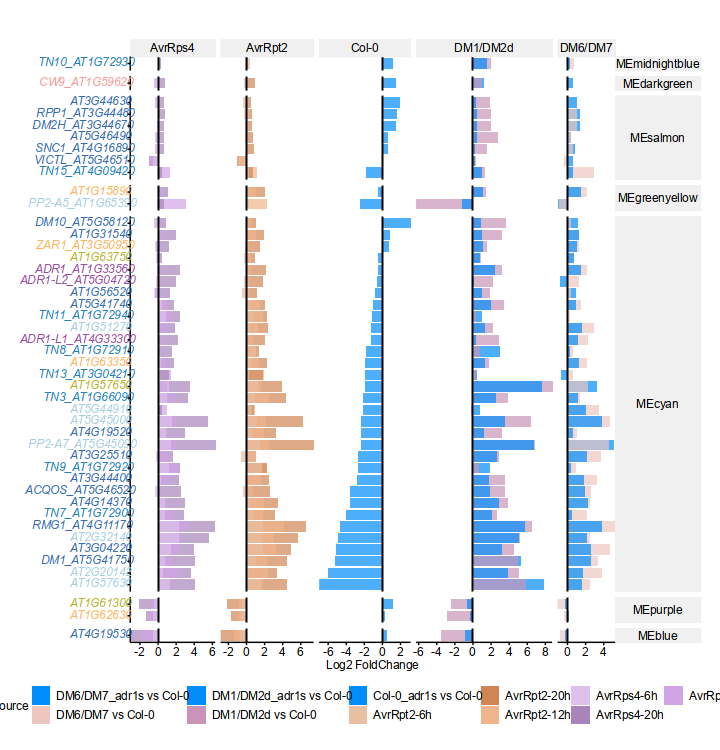

In [44]:


theme_custom <- function() {
  theme(
    text = element_text(family = "Arial", size = 8, face = "plain"),  # Set face = "plain" for all text
    axis.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for axis titles
    axis.text = element_text(family = "Arial", size = 8, face = "plain"),   # Overrides for axis text
    legend.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend titles
    legend.text = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend text
    strip.text.x = element_text(family = "Arial", size = 8, face = "plain"),  # Specific adjustment for x facet label
    strip.text.y = element_text(family = "Arial", size = 8, angle = 0, face = "plain")  # Specific adjustment for y facet label
  )
}



width_ = 7.2
height_ = 7.5
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 100)

bar_NLRs_plot <- plot_NLRs_overlay_bar(Res = Res_NLRs_in_connectivity_table , 
                      Res_base = Res_NLRs_in_connectivity_table_Col, 
                      facet_row = "module", alpha = 0.7) + 
                theme( strip.text.y = element_text(angle = 0)) + theme_custom() # Make facet labels horizontal)
# Save the final plot to a PDF file
bar_NLRs_plot
bar_NLRs_plot %>% ggsave(file = paste0("./plots/overlap_bar_NLRs", Sys.time(), ".pdf"),
                         width = width_ , height = height_)
# bar_NLRs_plot %>% ggsave(file = paste0("./plots/overlap_bar_NLRs", Sys.time(), ".png"), width = 14 , height = 10)

In [45]:
Res_combined

AGI,log2FC,source
<chr>,<dbl>,<fct>
AT1G30814,5.18459620,DM6/DM7
AT1G78930,0.01991274,DM6/DM7
AT1G71695,-2.30890364,DM6/DM7
AT1G58983,-0.17951020,DM6/DM7
AT1G12980,2.27948272,DM6/DM7
AT1G56250,0.77412597,DM6/DM7
AT1G66852,0.00000000,DM6/DM7
AT1G69810,2.76176191,DM6/DM7
AT1G72450,-0.41945456,DM6/DM7


#### remove Avrs and DM10/DM11

In [58]:
Res_combined_symbol <- Res_combined %>% left_join(map_id_name, by = c('AGI' = 'gene_id')) %>% dplyr::rename('Symbol' = 'gene_name')  %>% mutate(plot_label = paste0(Symbol, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') )  %>% mutate(category = source %>% str_remove('_adr1s') %>% str_remove('-\\d{1,2}h$')) %>% filter(str_detect(category, '^Avr', negate = TRUE) & str_detect(category, '^DM10', negate = TRUE))

In [59]:
Res_combined_symbol %>% sample_n(20)

AGI,log2FC,source,Symbol,plot_label,category
<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>
AT5G55210,-0.0460445,DM6/DM7,HS1,HS1_AT5G55210,DM6/DM7
AT2G32235,-0.1060502,DM1/DM2d,AT2G32235,AT2G32235,DM1/DM2d
AT3G27650,-0.5879282,Col-0_adr1s,LBD25,LBD25_AT3G27650,Col-0
AT1G78865,-1.2820253,DM6/DM7,AT1G78865,AT1G78865,DM6/DM7
AT1G23480,1.3848924,Col-0_adr1s,CSLA03,CSLA03_AT1G23480,Col-0
AT3G11330,0.5556676,DM6/DM7,PIRL9,PIRL9_AT3G11330,DM6/DM7
AT3G26360,-0.2331640,DM6/DM7,BS21M,BS21M_AT3G26360,DM6/DM7
AT2G01830,0.2061629,DM1/DM2d_adr1s,WOL,WOL_AT2G01830,DM1/DM2d
AT5G52530,0.2561303,DM6/DM7,AT5G52530,AT5G52530,DM6/DM7


In [60]:
Res_Col_log2FC <- Res_combined_symbol %>% filter(source == 'Col-0_adr1s' ) %>%
     arrange(desc(log2FC))

In [61]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  # "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  # "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
    "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

bar_colors <-  c("DM6/DM7 vs Col-0" = "#EDC5BF", 'DM1/DM2d vs Col-0' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s vs Col-0' = '#008DFA' , 'DM1/DM2d_adr1s vs Col-0' = '#008DFA', 
                 'Col-0_adr1s vs Col-0' = '#008DFA',
                 "DM6/DM7" = "#EDC5BF", 'DM1/DM2d' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s' = '#008DFA' , 'DM1/DM2d_adr1s' = '#008DFA', 
                 'Col-0_adr1s' = '#008DFA',
                  "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#cfa3e6", "AvrRps4-20h" = "#a884ba", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#cf8655")

theme_custom <- function() {
  theme(
    text = element_text(family = "Arial", size = 8, face = "plain"),  # Set face = "plain" for all text
    axis.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for axis titles
    axis.text = element_text(family = "Arial", size = 8, face = "plain"),   # Overrides for axis text
    legend.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend titles
    legend.text = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend text
    strip.text.x = element_text(family = "Arial", size = 8, face = "plain"),  # Specific adjustment for x facet label
    strip.text.y = element_text(family = "Arial", size = 8, angle = 0, face = "plain")  # Specific adjustment for y facet label
  )
}


In [62]:
plot_gene_family_overlay_bar <- function(Res, Res_base, alpha = 0.6, facet_col = "category", gene_id_col = "AGI", gene_symbol_col = "plot_label") {
  library(ggplot2)
  library(dplyr)
  library(purrr)
  library(rlang)
  library(ggtext)
  
  # Convert string column names to symbols
  facet_col_sym <- sym(facet_col)
  gene_id_col_sym <- sym(gene_id_col)
  gene_symbol_col_sym <- sym(gene_symbol_col)
  
  # Step 1: Split the dataframe based on log2FoldChange
  over0 <- Res %>% filter(log2FC > 0) 
  below0 <- Res %>% filter(log2FC <= 0)
  
  # Step 2: Create a list to store the dataframes for each layer
  layers <- list()
  
  # Step 3: Iterate until there are no rows left in over0 and below0
  layer_num <- 1
  while (nrow(over0) > 0 || nrow(below0) > 0) {
    max_over0 <- over0 %>% group_by(!!gene_id_col_sym) %>% slice_max(log2FC)
    min_below0 <- below0 %>% group_by(!!gene_id_col_sym) %>% slice_min(log2FC)
    over0 <- suppressMessages(anti_join(over0, max_over0))
    below0 <- suppressMessages(anti_join(below0, min_below0))
    layer <- bind_rows(max_over0, min_below0)
    layers[[layer_num]] <- layer
    layer_num <- layer_num + 1
  }
  
  # Step 4: Use the layers list to add new layers to the ggplot using geom_bar
  # The key difference is here - using "plot_label" instead of Symbol for ordering
  bar_base <- Res %>%
    ggplot(aes(x = reorder(!!gene_symbol_col_sym, log2FC), y = log2FC)) +
    labs(y = "Log2 FoldChange") +
    coord_flip() +
    guides(fill = guide_legend(reverse = TRUE, nrow = 2)) +
    scale_y_continuous(breaks = c(-8,-6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16),
                       expand = c(0, 0)) +
    scale_fill_manual(values = bar_colors) +
    theme_Publication() +
    theme(axis.text = element_text(size = 8),
          axis.title = element_text(size = 8),
          axis.title.y = element_blank()) +
    theme(text = element_text(size = 8, family = "Arial"), 
          strip.text = element_text(size = 12)) +
    facet_grid(cols = vars(!!facet_col_sym), scales = "free", space = "free") +
    theme(axis.text.y = element_markdown()) +
    geom_bar(data = Res_base,
             position = "identity", 
             stat = 'identity', 
             aes(fill = source), 
             width = .8, 
             alpha = 0)
  
  # Add layers using reduce
  bar_plot <- reduce(layers, function(plot, layer) {
    plot +
      geom_bar(data = layer,
               position = "identity",
               stat = 'identity',
               aes(fill = source),
               width = .8,
               alpha = alpha)
  }, .init = bar_base)
  
  # Add horizontal line at y=0
  bar_plot <- bar_plot + geom_hline(yintercept = 0, color = "black", size = 0.5)
  
  # Return the final plot
  return(bar_plot)
}

### DOFs family

In [63]:
#read excel
DOF_family <- readxl::read_excel('./refs/DOFs_Ath.xlsx')

In [64]:
Res_DOFs <- Res_combined_symbol %>% filter(AGI %in% DOF_family$gene_id)
Res_DOFs_Col <- Res_DOFs %>% filter(source == 'Col-0_adr1s' ) %>% arrange(desc(log2FC))

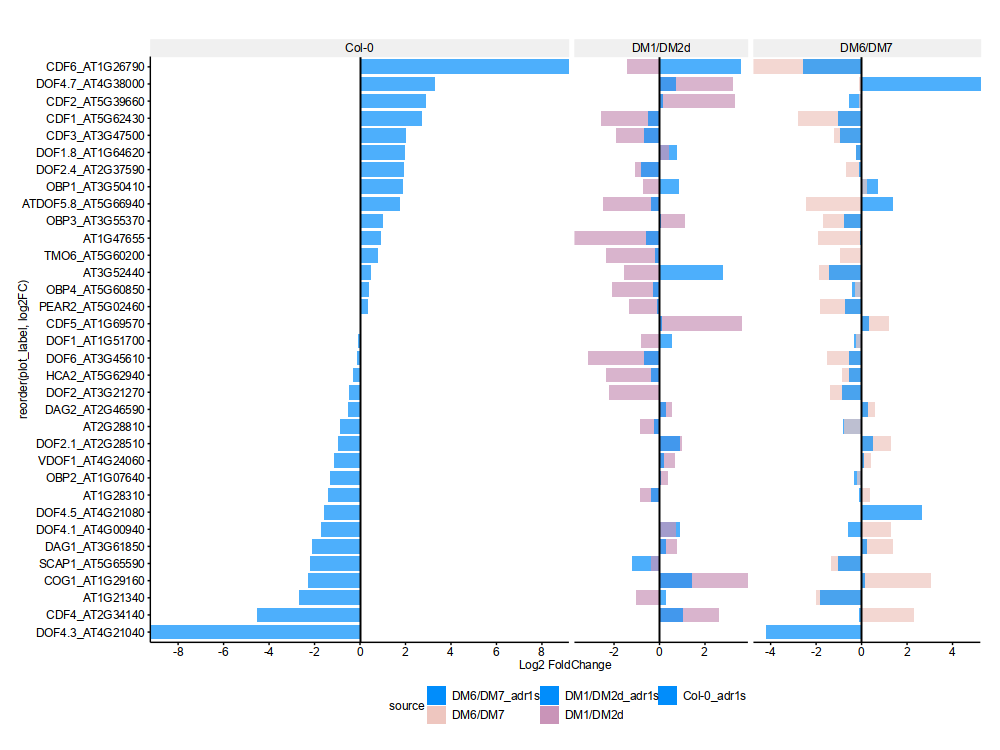

In [65]:
# Example usage for DOF family
width_ <- 10
height_ <- 7.5
options(repr.plot.width = width_, repr.plot.height = height_, repr.plot.res = 100)

# Create and display the plot
bar_DOFs_plot <- plot_gene_family_overlay_bar(
  Res = Res_DOFs, 
  Res_base = Res_DOFs_Col, 
  alpha = 0.7,
  gene_id_col = "AGI",
  gene_symbol_col = "plot_label"
) + 
theme(strip.text.y = element_text(angle = 0)) +
theme_Publication() +
theme(strip.text.y = element_text(angle = 0)) + 
theme_custom() # Make facet labels horizontal

# Display the plot
bar_DOFs_plot

### WRKY 

In [66]:
WRKY_family <- readxl::read_excel('./refs/WRKY_Ath.xlsx')

In [67]:
WRKY_family <- WRKY_family %>% 
  dplyr::rename('AGI' = 'Locus ID') %>% 
  filter(AGI %>% str_detect('^At')) %>%
  mutate(AGI = toupper(AGI))

In [68]:
Res_WRKYs <- Res_combined_symbol %>% filter(AGI %in% WRKY_family$AGI)
Res_WRKYs_base <- Res_WRKYs %>% filter(source == 'Col-0_adr1s' ) %>% arrange(desc(log2FC))

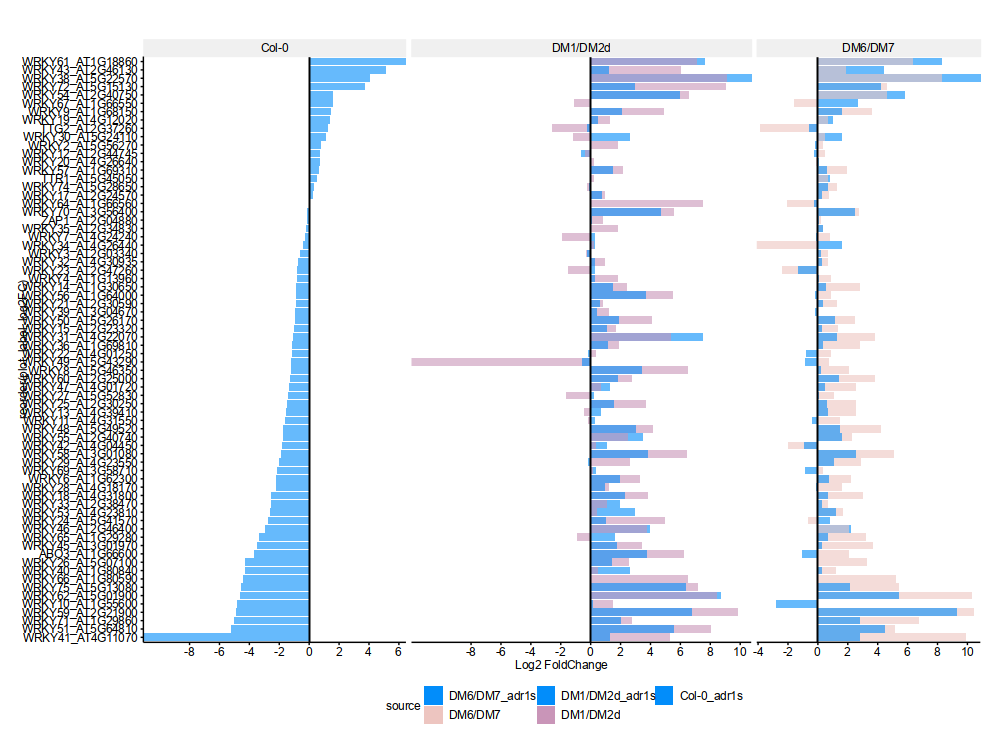

In [69]:
width_ <- 10
height_ <- 7.5
options(repr.plot.width = width_, repr.plot.height = height_, repr.plot.res = 100)

# Create and display the plot
bar_WRKYs_plot <- plot_gene_family_overlay_bar(
  Res = Res_WRKYs, 
  Res_base = Res_WRKYs_base, 
) + 
theme(strip.text.y = element_text(angle = 0)) +
theme_Publication() +
theme(strip.text.y = element_text(angle = 0)) + 
theme_custom() # Make facet labels horizontal

# Display the plot
bar_WRKYs_plot

### LRRs

In [75]:
RLKs <- LRRs %>% filter( GeneFamily %>% str_detect('RLK'))

In [74]:
RLPs <- LRRs %>% filter( GeneFamily %>% str_detect('RLP'))

In [78]:
Res_RLKs <- Res_combined_symbol %>% filter(AGI %in% RLKs$AGI)
Res_RLKs_base <- Res_RLKs %>% filter(source == 'Col-0_adr1s' ) %>% arrange(desc(log2FC))

Res_RLPs <- Res_combined_symbol %>% filter(AGI %in% RLPs$AGI)
Res_RLPs_base <- Res_RLPs %>% filter(source == 'Col-0_adr1s' ) %>% arrange(desc(log2FC)) 

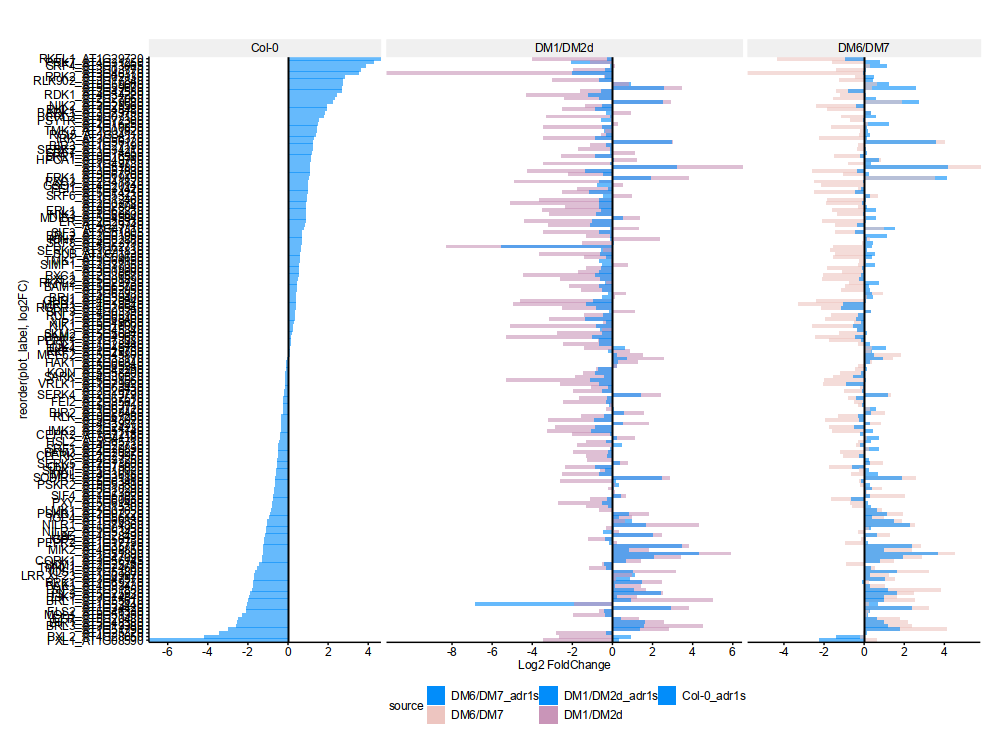

In [79]:
width_ <- 10
height_ <- 7.5
options(repr.plot.width = width_, repr.plot.height = height_, repr.plot.res = 100)

bar_RLKs_plot <- plot_gene_family_overlay_bar(
  Res = Res_RLKs, 
  Res_base = Res_RLKs_base, 
) + 
theme(strip.text.y = element_text(angle = 0)) +
theme_Publication() +
theme(strip.text.y = element_text(angle = 0)) + 
theme_custom() # Make facet labels horizontal

# Display the plot
bar_RLKs_plot

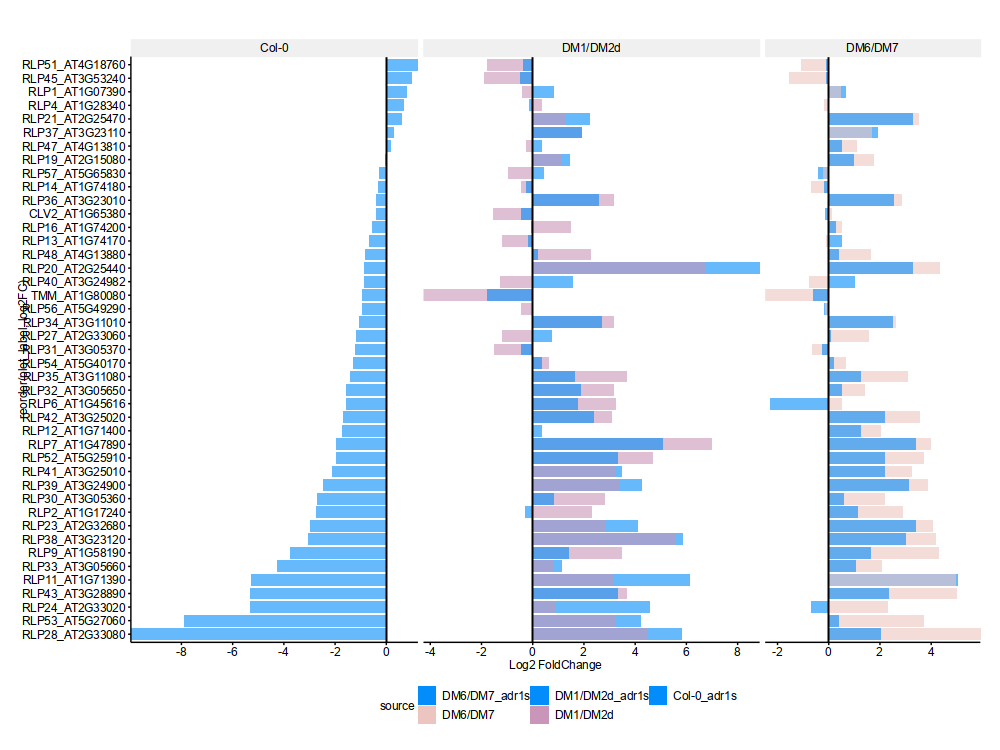

In [80]:
##for Res_RLPs

bar_RLPs_plot <- plot_gene_family_overlay_bar(
  Res = Res_RLPs, 
  Res_base = Res_RLPs_base, 
) + 
theme(strip.text.y = element_text(angle = 0)) +
theme_Publication() +
theme(strip.text.y = element_text(angle = 0)) + 
theme_custom() # Make facet labels horizontal

# Display the plot
bar_RLPs_plot